In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load model

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Yolov3 모델 및 설정 파일 로드
net = cv2.dnn.readNet('/content/drive/MyDrive/yolov3/data/yolov3_training.cfg', '/content/drive/MyDrive/yolov3/yolov3_training_10000.weights')

net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

# 클래스 파일 로드
classesFile = '/content/drive/MyDrive/yolov3/data/obj.names'
classes = None
with open(classesFile, 'rt') as f:
    classes = f.read().rstrip('\n').split('\n')

# 객체 탐지
def detect_objects(image):
    # blobFromImage 이미지 전처리
    blob = cv2.dnn.blobFromImage(image, 1/255.0, (416,416), swapRB=True, crop=False)
    net.setInput(blob)
    layerOutputs = net.forward(net.getUnconnectedOutLayersNames()) # 탐지된 객체 리스트
    return layerOutputs

# 바운딩 박스 그리기
def draw_boxes(image, layerOutputs, classes, confidence_threshold=0.5, nms_threshold=0.4):
    frameHeight, frameWidth = image.shape[:2]
    class_ids = []
    boxes = []
    confidences = []

    for output in layerOutputs:
        for detection in output:
            # 순서대로 x,y,w,h,confidence점수, detection[5:]부터 객체 클래스 확률
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * frameWidth)
                center_y = int(detection[1] * frameHeight)
                width = int(detection[2] * frameWidth)
                height = int(detection[3] * frameHeight)
                left = int(center_x - width / 2)
                top = int(center_y - height / 2)
                class_ids.append(class_id)
                confidences.append(float(confidence))
                boxes.append([left, top, width, height])

    # NMSBoxes : 박스가 겹치면 신뢰도가 가장 높은 상자 하나만 선택
    indices = cv2.dnn.NMSBoxes(boxes, confidences, confidence_threshold, nms_threshold)

    # 객체 정보 출력
    for i in indices:
        box = boxes[i]
        left, top, width, height = box
        class_id = class_ids[i]
        class_name = classes[class_id]
        label = f"{class_name}: {confidences[i]:.2f}"
        print(label)
        cv2.rectangle(image, (left, top), (left + width, top + height), (255, 0, 0), 2)
        cv2.putText(image, label, (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 3.0, (255, 0, 0), 3)
    return image

# Test

fork: 1.00
spoon: 1.00
coin: 1.00
dish: 0.94


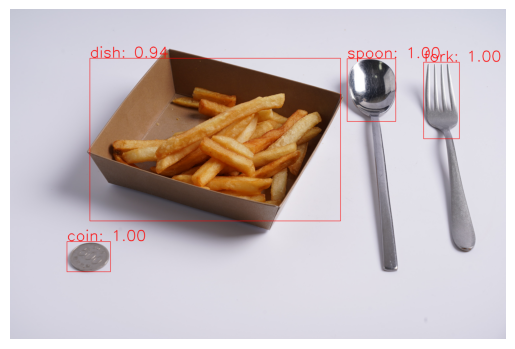

In [3]:
# Load image
image = cv2.imread('/content/drive/MyDrive/YANG/unzip/img_train/image/감자튀김(스틱형)/Q3/side_기타튀김_배달종이박스_감자튀김(스틱형)_Q3_00005.JPG')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
layerOutputs = detect_objects(image)
output_image = draw_boxes(image, layerOutputs, classes)
plt.imshow(output_image)
plt.axis('off')
plt.show()

fork: 1.00
coin: 1.00
spoon: 1.00
dish: 1.00
food: 0.99


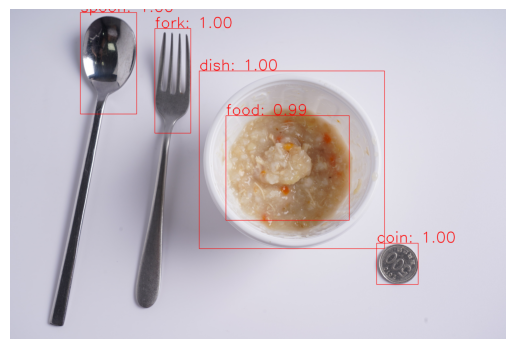

In [4]:
image = cv2.imread('/content/drive/MyDrive/yolov3/menu_test/003.JPG')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
layerOutputs = detect_objects(image)
output_image = draw_boxes(image, layerOutputs, classes)
plt.imshow(output_image)
plt.axis('off')
plt.show()

dish: 1.00
spoon: 1.00
fork: 1.00
coin: 1.00


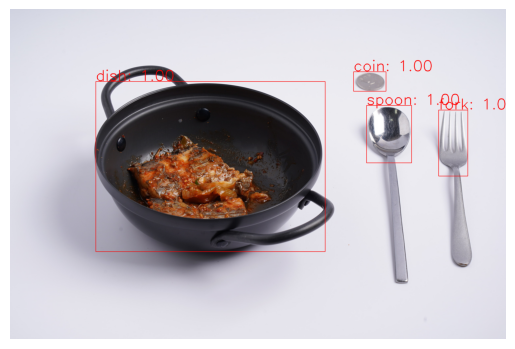

In [5]:
# Load image
image = cv2.imread('/content/drive/MyDrive/yolov3/menu_test/002.JPG')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform object detection
layerOutputs = detect_objects(image)

# Draw bounding boxes around detected objects
output_image = draw_boxes(image, layerOutputs, classes)

# Display the output image
plt.imshow(output_image)
plt.axis('off')
plt.show()

spoon: 1.00
fork: 1.00
coin: 0.97
dish: 0.96
food: 0.68


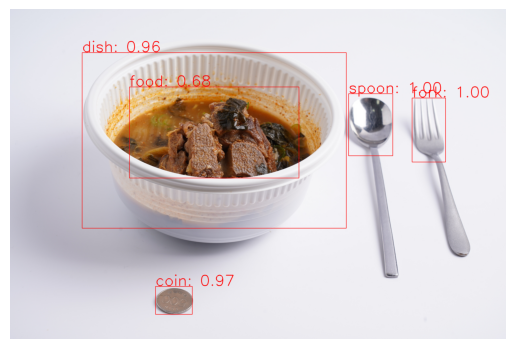

In [6]:
image = cv2.imread('/content/drive/MyDrive/yolov3/menu_test/001.JPG')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
layerOutputs = detect_objects(image)
output_image = draw_boxes(image, layerOutputs, classes)
plt.imshow(output_image)
plt.axis('off')
plt.show()

dish: 0.92


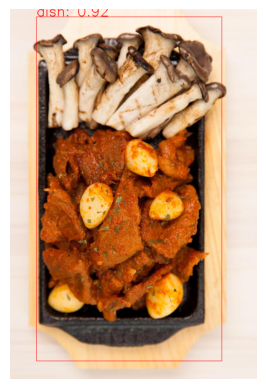

In [7]:
image = cv2.imread('/content/drive/MyDrive/food_data/Training/unzip/107/image/돼지고기고추장불고기/B080227XX_10503.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
layerOutputs = detect_objects(image)
output_image = draw_boxes(image, layerOutputs, classes)
plt.imshow(output_image)
plt.axis('off')
plt.show()

# Real img

dish: 0.92


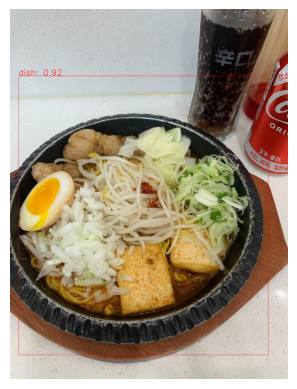

In [8]:
# Load image
image = cv2.imread('/content/drive/MyDrive/yolov3/menu_test/IMG_01.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
layerOutputs = detect_objects(image)
output_image = draw_boxes(image, layerOutputs, classes)
plt.imshow(output_image)
plt.axis('off')
plt.show()

dish: 0.92


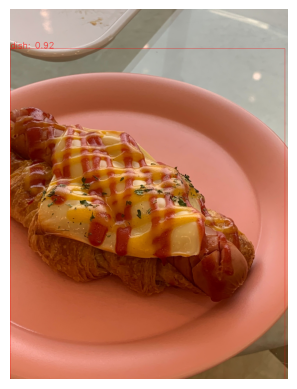

In [9]:
# Load image
image = cv2.imread('/content/drive/MyDrive/yolov3/menu_test/IMG_02.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
layerOutputs = detect_objects(image)
output_image = draw_boxes(image, layerOutputs, classes)
plt.imshow(output_image)
plt.axis('off')
plt.show()

dish: 0.98
spoon: 0.93


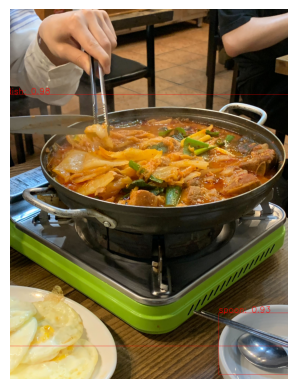

In [10]:
# Load image
image = cv2.imread('/content/drive/MyDrive/yolov3/menu_test/IMG_04.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
layerOutputs = detect_objects(image)
output_image = draw_boxes(image, layerOutputs, classes)
plt.imshow(output_image)
plt.axis('off')
plt.show()